# 0.0 Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.tree import DecisionTreeRegressor

In [2]:
warnings.filterwarnings('ignore')

# 1.0 Load Datasets

In [3]:
#Data Path
data_path_X_trian = '../regressao/X_training.csv'
data_path_y_trian = '../regressao/y_training.csv'

data_path_X_val = '../regressao/X_validation.csv'
data_path_y_val = '../regressao/y_val.csv'

data_path_X_test = '../regressao/X_test.csv'
data_path_y_test = '../regressao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

# 2.0 Performance

## Parameters:
- `max_depth`

## 2.1 Train Performance

In [4]:
# Define Model
decision_tree_train = DecisionTreeRegressor(random_state=42)

#Fit Model
decision_tree_train.fit(X_train, y_train)

#Predict
y_pred_train = decision_tree_train.predict(X_train)

#Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = mt.mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")

Train R2: 0.9917566957405923
Train MSE: 3.940402971731975
Train RMSE: 1.9850448286454327
Train MAE: 0.21409852496986279
Train MAPE: 0.08262787375974134


## 2.2 Validation Performance

In [5]:
# Define Model
decision_tree = DecisionTreeRegressor(random_state=42)

#Fit Model
decision_tree.fit(X_train, y_train)

#Predict
y_pred_val = decision_tree.predict(X_val)

#Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = mt.mean_squared_error(y_val, y_pred_val, squared=False)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: -0.30391776516619506
Validation MSE: 622.6358739032412
Validation RMSE: 24.95267268056152
Validation MAE: 17.166615476980443
Validation MAPE: 6.941831785416537


## 2.3 Fine Tunning

In [6]:
max_depth = np.arange(2, 31, 1)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [7]:
for i in max_depth:
    # Define Model
    decision_tree = DecisionTreeRegressor(max_depth=i, random_state=42)

    #Fit Model
    decision_tree.fit(X_train, y_train)

    #Predict
    y_pred_val = decision_tree.predict(X_val)

    #Performance Metrics
    r2 = mt.r2_score(y_val, y_pred_val)
    mse = mt.mean_squared_error(y_val, y_pred_val)
    rmse = mt.mean_squared_error(y_val, y_pred_val, squared=False)
    mae = mt.mean_absolute_error(y_val, y_pred_val)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred_val)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)


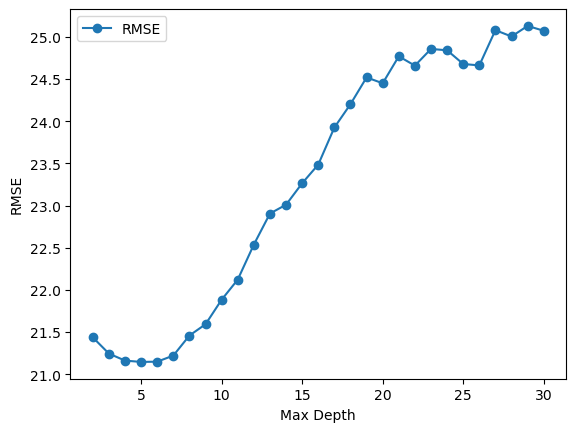

In [8]:
plt.plot(max_depth, rmse_list, marker='o', label="RMSE")
plt.xlabel("Max Depth")
plt.ylabel("RMSE")
plt.legend()

In [10]:
best_max_depth = max_depth[np.argmin(rmse_list)]
best_max_depth

5

## 2.4 Test Performance

In [11]:
# Define Model
decision_tree = DecisionTreeRegressor(random_state=42, max_depth= best_max_depth)

#Fit Model
decision_tree.fit(pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0))

#Predict
y_pred_test = decision_tree.predict(X_test)

#Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = mt.mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Test R2: {r2_test}")
print(f"Test MSE: {mse_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test MAPE: {mape_test}")

Test R2: 0.09047547149696622
Test MSE: 442.84838052138286
Test RMSE: 21.043963042197703
Test MAE: 16.82978094998882
Test MAPE: 7.883226145162678


# 3.0 Results

In [12]:
train_metrics = {
    "Algorithm": "Decision Tree - Regressor",
    "R2": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Decision Tree - Regressor",
    "R2": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Decision Tree - Regressor",
    "R2": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv("./reg_train_metrics.csv")
pd.DataFrame(validation_metrics, index=[0]).to_csv("./reg_validation_metrics.csv")
pd.DataFrame(test_metrics, index=[0]).to_csv("./reg_test_metrics.csv")